In [1]:
import cv2, time
import matplotlib.pyplot as plt
import numpy as np
import Vision as vis

In [2]:
cap = cv2.VideoCapture(0) 

In [8]:
env = vis.takePicture()

In [9]:
def color_mask(imgRGB, color):
    img_hsv = cv2.cvtColor(imgRGB, cv2.COLOR_RGB2HSV)

    if color == 'red':
        mask = cv2.inRange(img_hsv, lower_red, upper_red)
    if color == 'green':
        mask = cv2.inRange(img_hsv, lower_green, upper_green)
    if color == 'cyan':
        mask = cv2.inRange(img_hsv, lower_cyan, upper_cyan)
    if color == 'pink':
        mask = cv2.inRange(img_hsv, lower_cyan, upper_cyan)
        
    output_hsv = img_hsv.copy()
    output_hsv[np.where(mask==0)] = 0
    
    return output_hsv

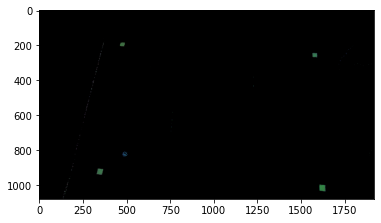

In [10]:
lower_green=np.array([30,40,40]) #only one that we tested
upper_green=np.array([70,255,255])
output = color_mask(env, 'green')
plt.figure()
plt.imshow(output)
plt.show()

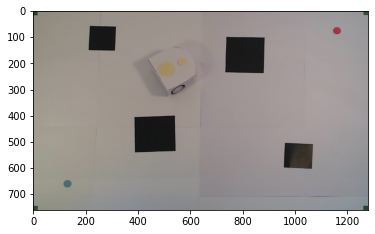

In [11]:
env = cv2.cvtColor(env, cv2.COLOR_BGR2RGB)
new_env = vis.img_calibration(env)
plt.figure()
plt.imshow(new_env)
plt.show()

In [13]:
a = 0
coord = []
x = 0
y = 0
while True:
    a = a + 1
    _, frame = cap.read()
    frame = vis.img_calibration(frame)
    
    #Show result 
    cv2.imshow("results", frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):      
        break
cap.release() 
  
cv2.destroyAllWindows() 